# A. Seaborn

API: https://seaborn.pydata.org/api.html

## 1. Introduction

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Seaborn is complimentary to Matplotlib and it specifically targets statistical data visualization. In particular, it defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames. In short, we can say that Seaborn is an extention of Matplotlib.


## 2. Setting up

Seaborn can be install by running either of these command on `terminal` or `cmd`.

`pip install seaborn`

or 

`conda install seaborn`

In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import in order to create mathplotlib's joinplot
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd

## 3. Example plots

### Joinplot - Seaborn versus Mathplotlib

Joinplot is used for visualizing the relationship between two multivariate random variables. It can be very usefull for finding the correlation between two variables. In the example below, we will explore how Seaborn can be more efficient than Mathplotlib.

In [2]:
# Generate random data
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

#### Joinplot Using Mathplotlib

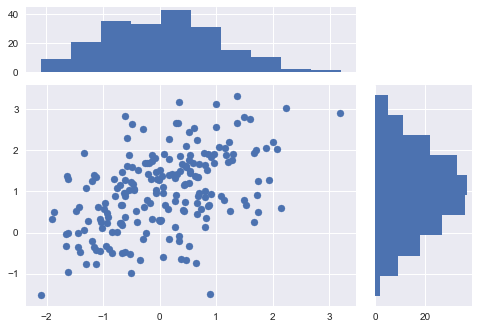

In [3]:
fig = plt.figure()

# Set up the grid for plot
gs = GridSpec(4,4)

# Add the subplot to the grid
ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

# produce the subplot
ax_joint.scatter(df["x"],df["y"])
ax_marg_x.hist(df["x"])
ax_marg_y.hist(df["y"],orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

plt.show()

As you can see from the example above, mathplotlib requires a lot of process and codes to produce a join plot. Fortunately, seaborn provide a very nice function to generate and customize joinplot.

#### Joinplot using Seaborn

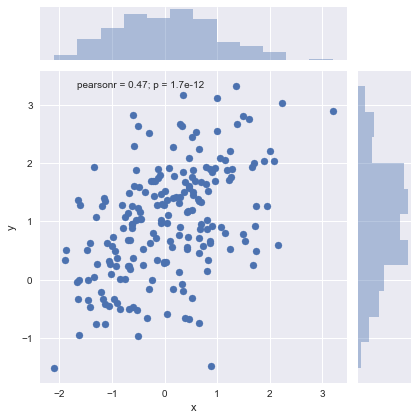

In [4]:
sns.jointplot(x="x", y="y", data=df);

# Show plot
plt.show()

#### Stying your joinplot

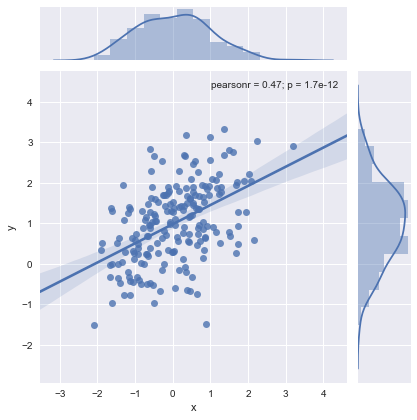

In [5]:
sns.jointplot(x="x", y="y", data=df, kind="reg");

# Show plot
plt.show()

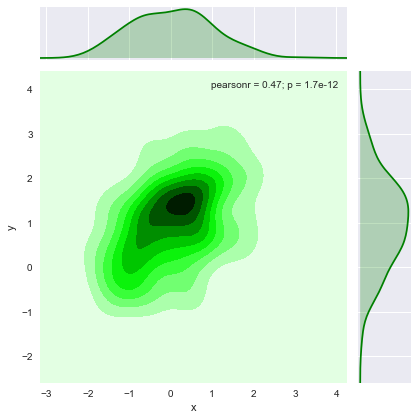

In [6]:
sns.jointplot(x="x", y="y", data=df, kind="kde", color="g");

# Show plot
plt.show()

There are many other functional and visually pleasing type of plots avalable from the seabon package.  

### Combining two plots

Seaborn also provide a very easy way to overlay or join multiple plots together. In the example below we will join a swarm plot and a violin plot together. 

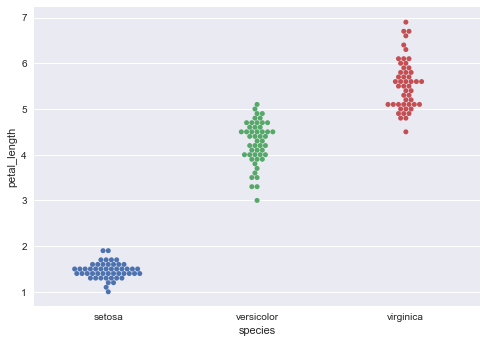

In [7]:
# Load iris data
iris = sns.load_dataset("iris")

# Construct iris plot
sns.swarmplot(x="species", y="petal_length", data=iris)

# Show plot
plt.show()

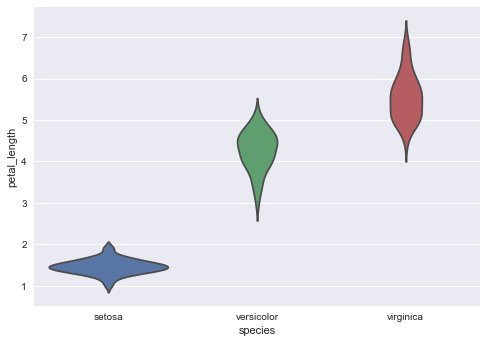

In [8]:
sns.violinplot(x="species", y="petal_length", data=iris, inner=None)

# Show plot
plt.show()

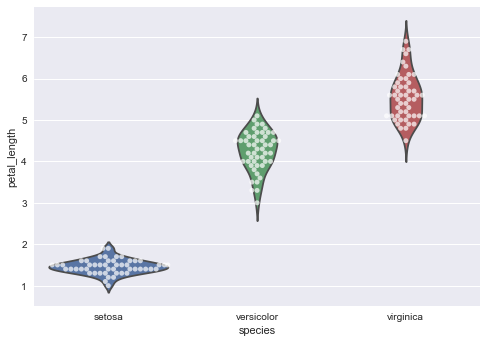

In [9]:
sns.violinplot(x="species", y="petal_length", data=iris, inner=None)
sns.swarmplot(x="species", y="petal_length", data=iris, color="w", alpha=.7);

# Show plot
plt.show()

# B. Plotly

API: https://plot.ly/api/

## 1. Introduction

Plotly is a library that allow users to create interactive and complex plots. Users can also host their plots and data on plotly. In order to have an overview on the functionality of plotly, please read this cheet https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf. Please also note that, plotly also support a platitute of other programming language such as `R` and `mathlab`. 

![](plotly_plans.png)

## 2. Setting up

Plotly can be install by running either of these command on `terminal` or `cmd`.

pip install plotly

or 

conda install plotly


### Online mode

When plotting online, the plot and data will be saved to your cloud account. 

First, you need to set up the credential in order to communicate with plotly's server.

`plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')`

The initialization step places a special .plotly/.credentials file in your home directory. Your ~/.plotly/.credentials file should look something like this: 


{
    
    "username": "DemoAccount",
    
    "stream_ids": ["ylosqsyet5", "h2ct8btk1s", "oxz4fm883b"],
    
    "api_key": "lr1c37zw81"
    
}

### Ofline mode

Plotly can also be run in offline mode, which does not requires any credential set up. In order to use the offline mode, user need to import plotly.offline and activate plotly offline mode. In particular,

`import plotly`

`import plotly.offline as py`

`plotly.offline.init_notebook_mode(connected = True)`

## 3. Example plots

In [10]:
#Import plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go

## Activating plotly notebook mode
plotly.offline.init_notebook_mode(connected = True)

### Scatter plot

Plotly is higly interactive. For example, in the scatter plot below, when user hover over each data point, the plot shows the coordinate of the point.

In [11]:
# Creating the trace | plot
trace = go.Scatter(
    x = df["x"],
    y = df["y"],
    mode = "markers",
)

# put all the trace into a list
data = [trace]

# generate figure
fig = go.Figure(data=data)

# plot
## iplot is specifically use for Jupyter Notebook, normally use plot
py.iplot(fig)

### Overlay histogram

From the code above, we can see that the `data` variable is a list. This is because plotly take a list of traces in order to generate a plot. This process make it easier to create a plot with multiple layers. 

In [12]:
# Overlay graph

# Generate two histogram traces
trace0 = go.Histogram(
    x = df["x"],
    opacity=0.75,
    name = "x data"
)
trace1 = go.Histogram(
    x = df["y"],
    opacity=0.75,
    name = "y data"
)

# Combine the two histogram by putting them it a list
data = [trace0, trace1]

# Create a layout
layout = go.Layout(barmode='overlay')

# Generate figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
py.iplot(fig)

### 3D plots of iris dataset

Plotly also allows user to create interactive 3D plots.

In [13]:
# Trace for setosa
traceIris1 = go.Scatter3d(
    x=iris[iris["species"]=="setosa"]["sepal_length"],
    y=iris[iris["species"]=="setosa"]["sepal_width"],
    z=iris[iris["species"]=="setosa"]["species"],
    mode='markers',
    opacity=0.8,
    marker=dict(
        size = 3,
        color="red",
    ),
    name = "setosa"
)

# Trace for versicolor
traceIris2 = go.Scatter3d(
    x=iris[iris["species"]=="versicolor"]["sepal_length"],
    y=iris[iris["species"]=="versicolor"]["sepal_width"],
    z=iris[iris["species"]=="versicolor"]["species"],
    mode='markers',
    opacity=0.8,
    marker=dict(
        size = 3,
        color="blue",
    ),
    name = "versicolor"
)

# Trace for virginica
traceIris3 = go.Scatter3d(
    x=iris[iris["species"]=="virginica"]["sepal_length"],
    y=iris[iris["species"]=="virginica"]["sepal_width"],
    z=iris[iris["species"]=="virginica"]["species"],
    mode='markers',
    opacity=0.8,
    marker=dict(
        size = 3,
        color="green",
    ),
    name = "virginica"
)

# Combine the traces
data = [traceIris1, traceIris2, traceIris3]

# Create layout
layout = go.Layout(
    title="Sepal and Species",
    scene=dict(xaxis=dict(title='Sepal length'),
               yaxis=dict(title='Sepal width'),
               zaxis=dict(title='Species'))
)

# Generate figure
fig = go.Figure(data = data, layout=layout)

# Show figure
py.iplot(fig)

### Annimation with plotly

In [14]:
n = 100

# PDF of standard normal distribution
f = lambda x : ( 1 / np.sqrt(2*np.pi) ) * np.exp(-x**2/2)
x = np.linspace(-3, 3, n)
y = f(x)

trace = go.Scatter(x = x, y = y)

# First trace for animation
# Second trace for the plot
data = [trace, trace]

layout = go.Layout(
    xaxis = {"range":[-3, 3], 'autorange':False},
    yaxis = {"range":[0, 0.5], 'autorange':False},
    
    # For animation
    updatemenus = [{'type': 'buttons',
                     'buttons': [{'label': 'Play',
                     'method': 'animate',
                     'args': [None]}]}]
)


frames=[dict(data=[dict(x=[x[k]], 
                        y=[y[k]], 
                        mode='markers', 
                        marker=dict(color='blue', size= (-(k)**2 + 95*k + 1000)/100)
                        )
                  ]) for k in range(0,n,5)]  

fig = go.Figure(data = data, layout=layout, frames=frames)

py.iplot(fig)

# C. Bokeh


## 1. Introduction

Bokeh is very similar to plotly. It's geared toward creating interactive web plots. Thus, with bokeh you can export your plot into a `html` file.

## 2. Setting up

Bokeh can be install by running either of these command on `terminal` or `cmd`.

`pip install bokeh`

or 

`conda install bokeh`

## 3. Example plots

### Scatter plot

Bokeh allow user to either output the plot as a html file or output it to the notebook. If user wants to output the plot as a html file, he or she need to run the following command 

`bk.output_file("scatter.html")`.

On the other hand, if user wants to output the plot to jupyter notebook, he or see can run the following command

`bk.output_notebook()`.

In the example below, we will output the plot on jupyter notebook.

In [15]:
import bokeh.plotting as bk

# Output to notebook
bk.output_notebook()

# Create a new plot with titles and axis labels
p = bk.figure(title="Scatter plot", x_axis_label="x", y_axis_label="y")

p.scatter(df["x"], df["y"])

bk.show(p)

Loading BokehJS ...

### Interactive plot - click to hide

Bokeh provides a very simple and interactive ways to display data. In this example, by just using the command `legend.click_policy="hide"`, we can produce a plots that allow user to hide a particular dataset by just clicking to its' name on the legend. 

In [16]:
# Click to hide

p = bk.figure(title="Scatter plot", x_axis_label="length", y_axis_label="width")

p.scatter(iris["sepal_length"], iris["sepal_width"], color = "red",  legend="sepal")
p.scatter(iris["petal_length"], iris["petal_width"], color = "blue", legend="petal")

p.legend.click_policy="hide"

bk.show(p)

### Interactive plot II - tabs 

Another interesting example from bokeh is that it allow user to create tabs of plots. In this example, we produced 3 tabs of plot for the `sepal_length` and `sepal_width` of `setosa`, `versicolor`, and `virginica`. We also exports the plot to a `html` file.

In [17]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show

In [18]:
# Output to html file
bk.output_file("iris.html")

p1 = bk.figure(plot_width=600, plot_height=600, x_axis_label="sepal_length", y_axis_label="sepal_width")
p1.scatter(iris[iris["species"]=="setosa"]["sepal_length"],
           iris[iris["species"]=="setosa"]["sepal_width"], 
           size=5, color="red")
tab1 = Panel(child=p1, title="setosa")

p2 = bk.figure(plot_width=600, plot_height=600, x_axis_label="sepal_length", y_axis_label="sepal_width")
p2.scatter(iris[iris["species"]=="versicolor"]["sepal_length"],
           iris[iris["species"]=="versicolor"]["sepal_width"], 
           size=5, color="blue")
tab2 = Panel(child=p2, title="versicolor")


p3 = bk.figure(plot_width=600, plot_height=600, x_axis_label="sepal_length", y_axis_label="sepal_width")
p3.scatter(iris[iris["species"]=="virginica"]["sepal_length"],
           iris[iris["species"]=="virginica"]["sepal_width"], 
           size=5, color="green")
tab3 = Panel(child=p3, title="virginica")

tabs = Tabs(tabs=[ tab1, tab2, tab3 ])

show(tabs)